In [68]:
import os
import pandas as pd
import numpy as np
import nibabel as nib
import nrrd

In [69]:
radiomics_features_dir = os.path.join(os.path.dirname(os.getcwd()), "data",  "radiomics_features.csv")
radiomics_df= pd.read_csv(radiomics_features_dir)

radiomics_df
# len(radiomics_df["Subject ID"].unique())

,pv_Liver_diagnostics_Versions_PyRadiomics,pv_Liver_diagnostics_Versions_Numpy,pv_Liver_diagnostics_Versions_SimpleITK,pv_Liver_diagnostics_Versions_PyWavelet,pv_Liver_diagnostics_Versions_Python,pv_Liver_diagnostics_Configuration_Settings,pv_Liver_diagnostics_Configuration_EnabledImageTypes,pv_Liver_diagnostics_Image-original_Hash,pv_Liver_diagnostics_Image-original_Dimensionality,pv_Liver_diagnostics_Image-original_Spacing,...,delayed_Mass_original_gldm_GrayLevelNonUniformity,delayed_Mass_original_gldm_GrayLevelVariance,delayed_Mass_original_gldm_HighGrayLevelEmphasis,delayed_Mass_original_gldm_LargeDependenceEmphasis,delayed_Mass_original_gldm_LargeDependenceHighGrayLevelEmphasis,delayed_Mass_original_gldm_LargeDependenceLowGrayLevelEmphasis,delayed_Mass_original_gldm_LowGrayLevelEmphasis,delayed_Mass_original_gldm_SmallDependenceEmphasis,delayed_Mass_original_gldm_SmallDependenceHighGrayLevelEmphasis,delayed_Mass_original_gldm_SmallDependenceLowGrayLevelEmphasis
0,3.1.0a2,1.21.6,2.1.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},f11bcd9f9a6ff6a433e88eeb384cf5f8d1e3974d,3D,"(1.0, 1.0, 1.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.1.0a2,1.21.6,2.1.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b7d8e7f16f64b059d443f72bc930eaa12e199f32,3D,"(1.0, 1.0, 1.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.1.0a2,1.21.6,2.1.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},62f7bf5d221da8d6eec30ae5db01ec4f14047a35,3D,"(1.0, 1.0, 1.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.1.0a2,1.21.6,2.1.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0ead7f0647bdb4e5e41bfe858a591a33cc93b6a7,3D,"(1.0, 1.0, 1.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.1.0a2,1.21.6,2.1.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7075111bb8bf3eadf157c2435889433e28083964,3D,"(1.0, 1.0, 1.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,3.1.0a2,1.21.6,2.1.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},81d60f43f27a8b6633483c96789e99208f32a277,3D,"(1.0, 1.0, 1.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,3.1.0a2,1.21.6,2.1.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a4c129cd96249bc3a19caa1ac92b4abccf868b6a,3D,"(1.0, 1.0, 1.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,3.1.0a2,1.21.6,2.1.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},4f33d912bdec864fa6adfd66c9990b30099d7b17,3D,"(1.0, 1.0, 1.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,3.1.0a2,1.21.6,2.1.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1cb80c4f311ca7b85d38c9f0b329aa88db2a4a9b,3D,"(1.0, 1.0, 1.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
def remove_diagnostic_cols(df):
    copy = df.copy()
    retained_cols = []
    for column in copy.columns:
        if "diagnostics" in column:
            continue

        retained_cols.append(column)

    return copy[retained_cols]

radiomics_df = remove_diagnostic_cols(radiomics_df)



In [71]:



# def generate_custom_sample_weights(x_train : pd.DataFrame, y_train : pd.DataFrame,  weighting_config : dict, 
#     default_weight = 1) -> np.ndarray:
#     print
#     for key in weighting_config:
#         current_setting = weighting_config[key]
#         mask = current_setting.get("boolean_mask" , [])
#         mask_rows_idx = x_train[mask].index


# test_cfg = {
#     "mask" : 
# } 
# generate_custom_sample_weights(clin_df.drop("responder"), clin_df["responder"])
    


In [72]:
radiomics_df["Subject ID"].unique()

array(['HCC_005', 'HCC_004', 'HCC_006', 'HCC_009', 'HCC_012', 'HCC_013',
       'HCC_014', 'HCC_015', 'HCC_016', 'HCC_017', 'HCC_018', 'HCC_019',
       'HCC_020', 'HCC_021', 'HCC_022', 'HCC_023', 'HCC_024', 'HCC_025',
       'HCC_026', 'HCC_027', 'HCC_029', 'HCC_031', 'HCC_032', 'HCC_033',
       'HCC_034', 'HCC_035', 'HCC_036', 'HCC_037', 'HCC_038', 'HCC_039',
       'HCC_040', 'HCC_041', 'HCC_042', 'HCC_043', 'HCC_044', 'HCC_045',
       'HCC_046', 'HCC_047', 'HCC_048', 'HCC_049', 'HCC_050', 'HCC_051',
       'HCC_052', 'HCC_053', 'HCC_055', 'HCC_056', 'HCC_057', 'HCC_058',
       'HCC_059', 'HCC_060', 'HCC_061', 'HCC_062', 'HCC_063', 'HCC_064',
       'HCC_066', 'HCC_067', 'HCC_069', 'HCC_070', 'HCC_071', 'HCC_072',
       'HCC_073', 'HCC_075', 'HCC_076', 'HCC_077', 'HCC_078', 'HCC_079',
       'HCC_080', 'HCC_081', 'HCC_083', 'HCC_084', 'HCC_086', 'HCC_087',
       'HCC_088', 'HCC_090', 'HCC_098'], dtype=object)

In [73]:
len(radiomics_df)


75

In [74]:
radiomics_df["TCIA_ID"] = radiomics_df["Subject ID"]
radiomics_df = radiomics_df.drop(columns=["Subject ID"])

In [75]:
clin_df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), "data",  "clinical_df_cleaned.csv"))
clin_df["responder"].isna()

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Name: responder, Length: 99, dtype: bool

In [80]:
radiomics_df_merged = pd.merge(
    left=radiomics_df,
    right= clin_df[["TCIA_ID", "responder"]],
    on="TCIA_ID",
    how="left"
)

radiomics_df_final = radiomics_df_merged.drop(columns=["TCIA_ID", "responder"]).dropna(how='all', axis= 0)
metadata = radiomics_df_merged.loc[radiomics_df_final.index][["TCIA_ID", "responder"]]
radiomics_df_final = pd.concat([radiomics_df_final, metadata], axis = 1).reset_index(drop=True)



In [82]:
radiomics_df_merged = radiomics_df_merged[radiomics_df_merged["responder"].isna() == False]

In [85]:
radiomics_df_merged.to_csv(os.path.join(os.path.dirname(os.getcwd()), "data", "radiomics_df_cleaned.csv"))

In [ ]:
# early_death = radiomics_df_final[radiomics_df_final["final_mRecist"].isna()].index
# early_death

# sample_weight_generator_dict = {
#     "indices" : early_death, 
#     "weight" : len(radiomics_df_final)/len(early_death),
#     "df_length" : len(radiomics_df)
# }

# sample_weight_generator_dict
# output_fp = os.path.join(os.path.dirname(os.getcwd()), "data", "pickle_files" , "sample_weight_info.pkl")

# with open(output_fp, 'wb') as file:
#     pickle.dump(sample_weight_generator_dict, file)



In [ ]:
# import pickle

# def make_sample_weights(dataframe, mask, output_file_path, default_weight = 1):
#     print(len(dataframe))
#     # missing_measurement_mask = (clin_df["1_mRECIST"].isna()) & (clin_df["2_mRECIST"].isna()) & (clin_df["3_mRECIST"].isna())
#     weight_vec = np.ones(len(dataframe))
#     try:
#         affected_rows = dataframe[mask]
#         affected_idx = affected_rows.index
#         ratio = (len(affected_rows) * default_weight)/len(dataframe)
#         new_weight = 1/ratio
        

#         for idx in affected_idx:
#             weight_vec[idx] = new_weight

#         print(weight_vec)

    
#         if output_file_path:
      
#             with open(output_file_path, 'wb') as file:
#                 pickle.dump(weight_vec, file)

#         # for row in affected_rows.iterrows(): 
#         #     print(row)

#     except Exception as e : 
#         print(e)
    

#     return weight_vec

# output = os.path.join(os.path.dirname(os.getcwd()), "data", "pickle_files" , "sample_weights.pkl")

# mask = clin_df["final_mRecist"].isna() == True
# make_sample_weights(radiomics_df_final,  mask, output_file_path=output)
    

In [ ]:
clin_df["final_mRecist"].isna().sum()

np.int64(6)

In [ ]:
from sklearn.model_selection import train_test_split

def train_test_split_patients(
    dataframe: pd.DataFrame, 
    identifier: str, 
    endpoint: str, 
    test_ratio: float = 0.3,
    random_state: int = 42
):
    # Get unique patient IDs
    unique_patients = dataframe[identifier].unique()
    
    # Split patients into train and test
    train_patients, test_patients = train_test_split(
        unique_patients, 
        test_size=test_ratio,
        random_state=random_state,
        stratify=dataframe.groupby(identifier)[endpoint].first()  # Optional: maintain class balance
    )
    
    # Create masks
    train_mask = dataframe[identifier].isin(train_patients)
    test_mask = dataframe[identifier].isin(test_patients)
    
    # Split the data
    x_train = dataframe[train_mask].drop(columns=[endpoint], axis=1)
    x_test = dataframe[test_mask].drop(columns=[endpoint], axis=1)
    y_train = dataframe[train_mask][endpoint]
    y_test = dataframe[test_mask][endpoint]

 
    return x_train, x_test, y_train, y_test


In [ ]:
x_tr, x_ts, y_tr, y_ts = train_test_split_patients(
    dataframe=radiomics_df_final, 
    identifier= "TCIA_ID", 
    endpoint="responder"    
)


In [ ]:
radiomics_df_final.to_csv("radiomics_df_final.csv")

PermissionError: [Errno 13] Permission denied: 'radiomics_df_final.csv'

In [ ]:
import pickle

sample_weight_loc = os.path.join(os.path.dirname(os.getcwd()), "data", "pickle_files", "sample_weights.pkl")
with open(sample_weight_loc, 'rb') as file:
    # Load the object from the file
    loaded_object = pickle.load(file)

In [ ]:
print(len(loaded_object))

75


In [ ]:
loaded_object

array([ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  , 18.75,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  , 18.75,
        1.  ,  1.  ,  1.  ,  1.  , 18.75,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
       18.75,  1.  ,  1.  ])

In [ ]:
radiomics_df_final.loc[x_tr.index]

,pv_Liver_original_shape_Elongation,pv_Liver_original_shape_Flatness,pv_Liver_original_shape_LeastAxisLength,pv_Liver_original_shape_MajorAxisLength,pv_Liver_original_shape_Maximum2DDiameterColumn,pv_Liver_original_shape_Maximum2DDiameterRow,pv_Liver_original_shape_Maximum2DDiameterSlice,pv_Liver_original_shape_Maximum3DDiameter,pv_Liver_original_shape_MeshVolume,pv_Liver_original_shape_MinorAxisLength,...,delayed_Mass_original_gldm_LargeDependenceEmphasis,delayed_Mass_original_gldm_LargeDependenceHighGrayLevelEmphasis,delayed_Mass_original_gldm_LargeDependenceLowGrayLevelEmphasis,delayed_Mass_original_gldm_LowGrayLevelEmphasis,delayed_Mass_original_gldm_SmallDependenceEmphasis,delayed_Mass_original_gldm_SmallDependenceHighGrayLevelEmphasis,delayed_Mass_original_gldm_SmallDependenceLowGrayLevelEmphasis,TCIA_ID,responder,final_mRecist
0,0.771732,0.572528,99.086801,173.068916,196.888293,207.870152,177.019773,208.693555,1.118479e+06,133.562811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_004,1,3.0
2,0.820491,0.538293,93.107820,172.968692,211.026065,199.484335,183.741666,211.489952,1.376893e+06,141.919329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_006,0,1.0
3,0.923778,0.662870,104.812615,158.119356,254.017716,246.756965,195.920902,269.066906,1.240699e+06,146.067206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_009,0,2.0
5,0.675094,0.456587,96.868559,212.157869,249.689808,237.928561,185.326738,254.261676,1.507844e+06,143.226407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_013,0,2.0
6,0.561172,0.302685,68.341392,225.784191,233.848241,225.887140,162.289864,237.238277,7.819852e+05,126.703837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_014,0,2.0
7,0.591156,0.424530,81.872625,192.854658,199.210943,209.823736,152.295765,215.415877,8.878895e+05,114.007237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_015,0,2.0
8,0.616267,0.405928,108.121282,266.356040,275.283490,280.066064,228.326521,291.770458,2.324285e+06,164.146444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_016,0,2.0
10,0.590644,0.512766,114.716935,223.721972,271.532687,244.100389,179.002793,271.830830,1.624344e+06,132.139982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_018,1,3.0
11,0.585291,0.390932,94.506512,241.746442,256.891027,249.238841,183.763435,257.606289,1.682904e+06,141.492088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_019,1,3.0
12,0.685916,0.564771,126.037118,223.165194,293.860511,274.803566,218.036694,294.037413,2.218085e+06,153.072551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCC_020,1,3.0


In [ ]:

weights_series_full = pd.Series(loaded_object)

        # 2. Use Pandas .loc to select only the weights that correspond to the x_tr index.
        #    Pandas automatically handles the alignment and order.
weights_for_tr_series = weights_series_full.loc[x_tr.index]

        # 3. Convert the resulting Series back to a NumPy array for use in XGBoost's fit_params.
train_weights_final = weights_for_tr_series.to_numpy()

In [ ]:
for idx, weight in enumerate (train_weights_final):
    if weight > 1:
        print(x_tr.loc[idx]["TCIA_ID"])

HCC_024
HCC_039
HCC_044
HCC_061


In [ ]:
x_tr["TCIA_ID"]

0     HCC_004
2     HCC_006
3     HCC_009
5     HCC_013
6     HCC_014
7     HCC_015
8     HCC_016
10    HCC_018
11    HCC_019
12    HCC_020
13    HCC_021
14    HCC_022
16    HCC_024
17    HCC_025
18    HCC_026
19    HCC_027
23    HCC_033
25    HCC_035
26    HCC_036
27    HCC_037
29    HCC_039
31    HCC_041
34    HCC_044
35    HCC_045
36    HCC_046
37    HCC_047
38    HCC_048
41    HCC_051
42    HCC_052
44    HCC_055
45    HCC_056
46    HCC_057
47    HCC_058
48    HCC_059
49    HCC_060
50    HCC_061
51    HCC_062
52    HCC_063
54    HCC_066
55    HCC_067
56    HCC_069
60    HCC_073
61    HCC_075
63    HCC_077
64    HCC_078
67    HCC_081
68    HCC_083
69    HCC_084
70    HCC_086
71    HCC_087
72    HCC_088
74    HCC_098
Name: TCIA_ID, dtype: object

In [ ]:
print(f"loaded_object shape: {loaded_object.shape}")
print(f"y_tr shape: {y_tr.shape}")
print(f"y_ts shape: {y_ts.shape}")

loaded_object shape: (75,)
y_tr shape: (52,)
y_ts shape: (23,)


In [ ]:
missing_measurement_mask = (clin_df["1_mRECIST"].isna()) & (clin_df["2_mRECIST"].isna()) & (clin_df["3_mRECIST"].isna())


# clin_df.loc[y_tr_reset.index]
missing_patients = clin_df[missing_measurement_mask]
print(missing_patients["TCIA_ID"].tolist())

KeyError: '1_mRECIST'

In [ ]:
def get_sample_weights_for_split(
    sample_weights: np.ndarray,  # Array of weights in the same order as the original data
    y_train: pd.DataFrame, 
    y_test: pd.DataFrame,

) -> tuple[np.ndarray, np.ndarray]:
    y_train = y_train.reset_index()
    print(y_train)
    # print(y_train.index)
    train_weights = sample_weights[y_train.index]
    # test_weights = sample_weights[y_test.index]
    
    return train_weights


train_weights= get_sample_weights_for_split(
    sample_weights=loaded_object, 
    y_train=y_tr,
    y_test = y_ts

)
print(train_weights)

    index  responder
0       0          1
1       2          0
2       3          0
3       5          0
4       6          0
5       7          0
6       8          0
7      10          1
8      11          1
9      12          1
10     13          0
11     14          0
12     16          0
13     17          1
14     18          0
15     19          0
16     23          0
17     25          0
18     26          0
19     27          1
20     29          0
21     31          0
22     34          0
23     35          0
24     36          1
25     37          0
26     38          0
27     41          1
28     42          1
29     44          0
30     45          1
31     46          0
32     47          1
33     48          0
34     49          0
35     50          1
36     51          0
37     52          0
38     54          0
39     55          1
40     56          0
41     60          0
42     61          1
43     63          1
44     64          0
45     67          0
46     68    

In [ ]:
import pickle

sample_weight_loc = os.path.join(os.path.dirname(os.getcwd()), "data", "pickle_files", "sample_weights.pkl")

with open(sample_weight_loc, 'rb') as file:
    # Load the object from the file
    loaded_object = pickle.load(file)

# sample_w_updated = np.array([])
# for idx in radiomics_test_final.index:
#     sample_w_updated = np.append(sample_w_updated, loaded_object[idx])

# with open(sample_weight_loc, 'wb') as file:
    
#     # Load the object from the file
#     pickle.dump(sample_w_updated, file)


In [ ]:
radiomics_df_merged.to_csv("radiomics_df_cleaned.csv")

In [ ]:
radiomics_df["responder"].isna().sum()


KeyboardInterrupt



In [ ]:
parent_path = os.path.dirname(os.getcwd())

print(parent_path)
data_df = pd.read_csv(os.path.join(parent_path, "data", "combined_data.csv"))


d:\Penelitian MBKM\HCC-TACE-SEG\manifest-1643035385102\Pipeline


In [ ]:

# radio_pvt = pd.pivot(radiomics_df, index='PatientID', columns=['Phase', 'ROI'])

# print(radio_pvt)

# radiomics_df.columns = radiomics_df.columns.to_series().str.join('_')

def extend(iter, new_cols):
    iter = list(iter)
    iter.extend(new_cols)
    return iter

# def flatten_roi_and_mask_cols(df):
#     copy_df = df.copy()
    
#     transformed_df = pd.DataFrame()
#     for idx, pid in enumerate(copy_df["PatientID"].unique()):
#         print(pid)

#         patient_rows = copy_df[copy_df["PatientID"] == pid]
#         rdf_gpby = patient_rows.groupby(["Phase", "ROI"])
#         for identifier, data in rdf_gpby:
#             phase = identifier[0]
#             roi = identifier[1]
            
#             for feature in patient_rows.columns: 
#                 nc = f"phase_{phase}_roi_{roi}_{feature}"

#                 if nc in transformed_df.columns:
#                     continue

#                 transformed_df[nc] = data[feature]
#                 print(transformed_df)
            
    def flatten_roi_and_mask_cols(df):
        copy_df = df.copy()
        all_patient_rows = []

        for pid in copy_df["PatientID"].unique():
            patient_rows = copy_df[copy_df["PatientID"] == pid]
            rdf_gpby = patient_rows.groupby(["Phase", "ROI"])

            row_dict = {"PatientID": pid}
            for (phase, roi), data in rdf_gpby:
                for feature in patient_rows.columns:
                    nc = f"phase_{phase}_roi_{roi}_{feature}"
                    row_dict[nc] = data[feature].values[0] if not data.empty else None

            all_patient_rows.append(row_dict)

        transformed_df = pd.DataFrame(all_patient_rows)
        return transformed_df

    radiomics_df = flatten_roi_and_mask_cols(radiomics_df)


def pivot_table(radiomics_df : pd.DataFrame) -> pd.DataFrame:
    wide_radiomics = radiomics_df[radiomics_df["Phase"].isin([1,2])].pivot(index='PatientID', columns=["Phase", "ROI"])

    wide_radiomics.columns = [
    "_".join(map(str, col)).strip() for col in wide_radiomics.columns.values
    ]

    # print(wide_radiomics)

    return wide_radiomics

A/B Testing


Basic zero-imputation


combine endpoint and radiomic for initial test


In [ ]:
import math

def train_test_split_patients(dataframe : pd.DataFrame, identifier : str, endpoint : str, test_ratio : float):
    unique_patients = dataframe[identifier].unique()

    test_patients = unique_patients[math.floor(1-test_ratio * len(unique_patients)):]
    train_patients = unique_patients[ : math.floor(1-test_ratio * len(unique_patients))]

    train_mask = dataframe[identifier].isin(train_patients)
    test_mask =  dataframe[identifier].isin(test_patients)

    x_train = dataframe[train_mask].drop(columns=[endpoint, identifier], axis=1)
    x_test = dataframe[test_mask].drop(columns=[endpoint, identifier], axis=1)
    y_train = dataframe[train_mask][endpoint]
    y_test = dataframe[test_mask][endpoint]

    print(x_test)

    
    return x_train, x_test, y_train, y_test



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

def classification_metrics(y_true, y_pred):
    """
    Compute common classification metrics for binary classification.
    
    Returns a dictionary with:
    - Accuracy
    - F1 Score
    - Precision
    - Sensitivity (Recall)
    - Specificity
    - Confusion Matrix
    """
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    
    # Confusion matrix: [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    metrics_dict = {
        'Accuracy': acc,
        'F1 Score': f1,
        'Precision': precision,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'Confusion Matrix': confusion_matrix(y_true, y_pred)
    }
    
    return metrics_dict


Standardization of values


In [ ]:


from sklearn.base import BaseEstimator, TransformerMixin

class MissingValueColumnFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.3):
        self.threshold = threshold
        self.keep_features_ = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        missing_frac = X.isna().mean()
        self.keep_features_ = missing_frac[missing_frac <= self.threshold].index
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        # Only keep columns selected during fit
        return X[self.keep_features_]


In [ ]:
combined = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), "data", "combined_data.csv"))


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the Variance Inflation Factor (VIF) for all numeric columns in a DataFrame.
    """
    # Use only numeric, non-null columns
    X = df.select_dtypes(include=np.number).dropna(axis=1, how='any')

    if X.empty:
        return pd.DataFrame({'Feature': [], 'VIF': []})

    # Add constant for intercept term
    X_vif = sm.add_constant(X)
    
    features = X.columns
    vif_list = []

    for i in range(len(features)):
        # Calculate VIF. Index i+1 accounts for the added 'const' column at index 0.
        try:
            vif = variance_inflation_factor(X_vif.values, i + 1)
            vif_list.append(vif)
        except Exception:
            vif_list.append(np.nan) # Set to NaN if calculation fails (e.g., perfect collinearity)

    vif_df = pd.DataFrame({'Feature': features, 'VIF': vif_list})
    return vif_df.sort_values(by='VIF', ascending=False).reset_index(drop=True)

vif_df = calculate_vif(combined)

c:\Users\VI-01\anaconda3\envs\kevin-bioinformatics\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 

In [ ]:
combined["responder"].value_counts()

responder
0    45
1    25
Name: count, dtype: int64

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CleanFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, missing_thresh=0.3, variance_thresh=1e-6):
        self.missing_thresh = missing_thresh
        self.variance_thresh = variance_thresh

    def fit(self, X, y=None):
        X = pd.DataFrame(X, columns=X.columns if hasattr(X, "columns") else None)

        # Drop by missing %
        keep_missing = X.isna().mean() < self.missing_thresh
        X2 = X.loc[:, keep_missing]

        # Drop by variance
        var = X2.var()
        keep_var = var > self.variance_thresh

        self.keep_cols_ = X2.columns[keep_var].tolist()
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=X.columns if hasattr(X, "columns") else None)
        return X[self.keep_cols_]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif



# combined = pd.merge(
#     left=radiomics_df,
#     right= clin_df.drop(columns=['TNM']),
#     on="Subject ID",
#     how="inner"
# )


x_tr, x_ts, y_tr, y_ts = train_test_split_patients(combined, "Subject ID", "responder", 0.3)
x_tr_index = x_tr.index
x_ts_index = x_ts.index
x_cols = x_tr.columns
    
# === Custom transformer to add missing-value fractions per column ===
# def add_missing_fractions(X):
#     X = pd.DataFrame(X, columns=X.columns if hasattr(X, 'columns') else None)
#     # missing_frac = X.isna().mean().rename(lambda c: f"{c}_missing_frac")
#     # frac_df = pd.DataFrame([missing_frac.values] * len(X), columns=missing_frac.index, index=X.index)
#     return X



preprocess_pipe = Pipeline(steps=[
    ('clean', CleanFeatureSelector(missing_thresh=0.3, variance_thresh=1e-6)),
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

x_tr = preprocess_pipe.fit_transform(x_tr)
x_ts = preprocess_pipe.transform(x_ts)

kept_cols = preprocess_pipe.named_steps['clean'].keep_cols_

x_tr = pd.DataFrame(x_tr, columns=kept_cols, index=x_tr_index)
x_ts = pd.DataFrame(x_ts, columns=kept_cols, index=x_ts_index)


    Unnamed: 0  pv_Liver_original_shape_Elongation  \
50          50                            0.775825   
51          51                            0.605517   
52          52                            0.603377   
53          53                            0.514652   
54          54                            0.560579   
55          55                            0.714385   
56          56                            0.705798   
57          57                            0.822841   
58          58                            0.910643   
59          59                            0.492488   
60          60                            0.511110   
61          61                            0.481850   
62          62                            0.836902   
63          63                            0.830951   
64          64                            0.695834   
65          65                            0.778506   
66          66                            0.580774   
67          67              

In [ ]:
x_tr

,Unnamed: 0,pv_Liver_original_shape_Elongation,pv_Liver_original_shape_Flatness,pv_Liver_original_shape_LeastAxisLength,pv_Liver_original_shape_MajorAxisLength,pv_Liver_original_shape_Maximum2DDiameterColumn,pv_Liver_original_shape_Maximum2DDiameterRow,pv_Liver_original_shape_Maximum2DDiameterSlice,pv_Liver_original_shape_Maximum3DDiameter,pv_Liver_original_shape_MeshVolume,...,Pathology_Moderately differentiated,Pathology_NOT STATED,Pathology_No biopsy,Pathology_Poorly differentiated,Pathology_Well differentiated,HCV,HBV,Child Pugh A,multinodular,T_involvment > 50%
0,-1.697749,-0.422010,-0.322552,0.862736,1.293215,0.947496,1.098930,0.455013,1.143778,1.454514,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
1,-1.628453,0.998792,1.170195,0.080104,-1.344987,-1.218681,-1.048206,-0.333272,-1.489248,-0.562476,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
2,-1.559158,1.405416,0.830308,-0.276191,-1.347838,-0.752121,-1.366201,-0.069977,-1.387020,0.034967,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,1.457738,1.882938,-1.779513,-1.083473,-0.5
3,-1.489862,2.266762,2.067115,0.421311,-1.770225,0.666645,0.426407,0.407080,0.717823,-0.279908,...,-0.654654,-0.468521,-0.204124,3.000000,-0.782881,-0.685994,-0.531085,-1.779513,0.922958,2.0
4,-1.420566,-1.475789,-0.899557,-0.589076,0.596733,-0.457998,0.850398,-1.048593,0.905697,0.212057,...,-0.654654,2.134375,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
5,-1.351270,0.192888,0.019131,-0.052084,-0.233106,0.523820,0.091628,-0.007890,0.176587,0.337720,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
6,-1.281974,-0.757143,-1.508817,-1.752049,0.154493,0.001033,-0.364990,-0.910238,-0.445738,-1.340435,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,-0.685994,-0.531085,-1.779513,-1.083473,-0.5
7,-1.212678,-0.507096,-0.299131,-0.945708,-0.782184,-1.142031,-0.974125,-1.301705,-1.243500,-1.095589,...,-0.654654,2.134375,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,-1.779513,-1.083473,-0.5
8,-1.143382,-0.297688,-0.483817,0.618478,1.308554,1.368436,1.689509,1.676400,1.547797,2.225298,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,1.457738,-0.531085,-1.779513,-1.083473,-0.5
9,-1.074086,1.788018,1.567747,-0.655187,-2.239756,-1.097784,-2.845960,-1.026304,-1.144924,-1.012597,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,-0.685994,-0.531085,-1.779513,0.922958,-0.5


In [ ]:
combined.to_csv("combined_data.csv")

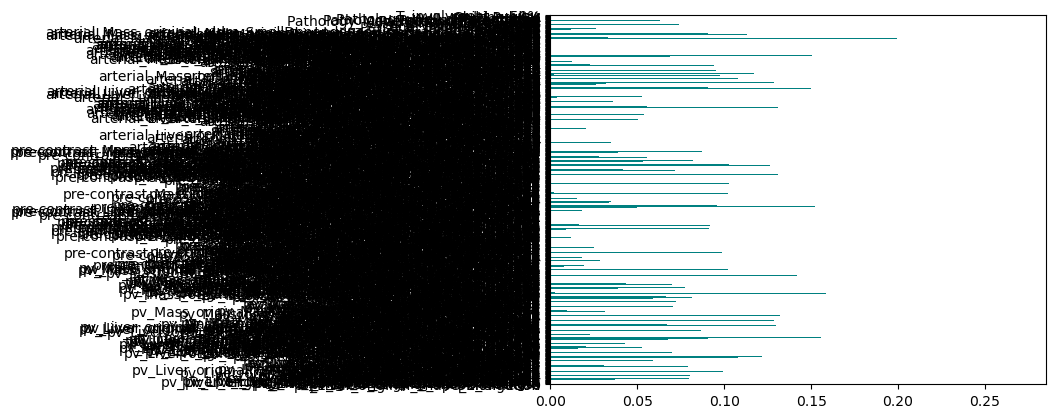

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(x_tr, y_tr)
feat_importances = pd.Series(importances, x_tr.columns[0:len(x_tr.columns)])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def cluster_and_select_features(df, correlation_threshold=0.9999):
    """
    Identifies and groups features that are perfectly or near-perfectly
    correlated, allowing the user to select one representative from each group.

    Args:
        df (pd.DataFrame): The input DataFrame of features.
        correlation_threshold (float): The absolute correlation threshold to
                                       define perfect redundancy (e.g., 0.9999).

    Returns:
        tuple: (list of lists of clustered feature names, list of unique (non-clustered) features)
    """
    print(f"--- Starting Feature Clustering Process ---")
    print(f"Data shape: {df.shape}")
    print(f"Clustering features with absolute correlation > {correlation_threshold}")

    # 1. Calculate the absolute correlation matrix
    corr_matrix = df.corr().abs()

    # 2. Identify the features to be clustered (upper triangle, excluding diagonal)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identify pairs exceeding the threshold
    high_corr_pairs = upper.stack()[upper.stack() >= correlation_threshold].index.tolist()

    if not high_corr_pairs:
        print("No perfectly correlated features found above the threshold. All features are unique.")
        return [], list(df.columns)

    # 3. Use an iterative method to create distinct clusters of features
    clusters = []
    clustered_features = set()

    for f1, f2 in high_corr_pairs:
        if f1 not in clustered_features and f2 not in clustered_features:
            # New cluster
            clusters.append({f1, f2})
            clustered_features.add(f1)
            clustered_features.add(f2)
        elif f1 in clustered_features and f2 not in clustered_features:
            # Add f2 to the cluster containing f1
            for cluster in clusters:
                if f1 in cluster:
                    cluster.add(f2)
                    clustered_features.add(f2)
                    break
        elif f2 in clustered_features and f1 not in clustered_features:
            # Add f1 to the cluster containing f2
            for cluster in clusters:
                if f2 in cluster:
                    cluster.add(f1)
                    clustered_features.add(f1)
                    break
        elif f1 in clustered_features and f2 in clustered_features:
            # Both features are already clustered, check if they are in the same cluster
            cluster_f1 = next(c for c in clusters if f1 in c)
            cluster_f2 = next(c for c in clusters if f2 in c)
            
            # Merge clusters if they are different (transitive property)
            if cluster_f1 is not cluster_f2:
                cluster_f1.update(cluster_f2)
                clusters.remove(cluster_f2)
                
    # Convert sets back to lists for readability
    clustered_list = [list(c) for c in clusters]

    # 4. Identify the features that were not clustered at all (the likely independent ones)
    all_features = set(df.columns)
    independent_features = list(all_features - clustered_features)

    print(f"\nAnalysis Complete:")
    print(f"Found {len(clustered_list)} clusters of perfectly correlated features.")
    print(f"Found {len(independent_features)} features that are not perfectly correlated with any other feature.")
    
    # 5. Provide guidance for selection
    print("\n--- Feature Selection Guidance ---")
    print("For each CLUSTER below, you MUST choose only ONE feature to keep.")
    print("When selecting, prefer features that are:")
    print("1. Simpler (e.g., 'Mean' over 'Wavelet LLL Mean').")
    print("2. More commonly reported in the literature.")
    
    for i, cluster in enumerate(clustered_list):
        print(f"\nCLUSTER {i+1} (Select 1 Feature):")
        for f in cluster:
            print(f"- {f}")

    print("\nINDEPENDENT FEATURES (Keep All):")
    for f in independent_features:
        print(f"- {f}")

    return clustered_list, independent_features


# Run the clustering function on the mock data
# For your actual 458 features, simply call the function on your loaded DataFrame.
# clustered, independent = cluster_and_select_features(your_dataframe)

clustered_groups, independent_list = cluster_and_select_features(x_tr)

# You can then use the results to build your final selection list
final_selection = independent_list.copy()

# Manually inspect the 'clustered_groups' and add one feature from each cluster to final_selection


print(f"\nFinal Selected Features for Modeling (after manual inspection): {final_selection}")
print(f"Total features kept: {len(final_selection)}")

--- Starting Feature Clustering Process ---
Data shape: (50, 672)
Clustering features with absolute correlation > 0.9999

Analysis Complete:
Found 61 clusters of perfectly correlated features.
Found 538 features that are not perfectly correlated with any other feature.

--- Feature Selection Guidance ---
For each CLUSTER below, you MUST choose only ONE feature to keep.
When selecting, prefer features that are:
1. Simpler (e.g., 'Mean' over 'Wavelet LLL Mean').
2. More commonly reported in the literature.

CLUSTER 1 (Select 1 Feature):
- arterial_Liver_original_shape_Elongation
- pv_Liver_original_shape_Elongation

CLUSTER 2 (Select 1 Feature):
- arterial_Liver_original_shape_Flatness
- pv_Liver_original_shape_Flatness

CLUSTER 3 (Select 1 Feature):
- pv_Liver_original_shape_LeastAxisLength
- arterial_Liver_original_shape_LeastAxisLength

CLUSTER 4 (Select 1 Feature):
- pv_Liver_original_shape_MajorAxisLength
- arterial_Liver_original_shape_MajorAxisLength

CLUSTER 5 (Select 1 Feature):

In [ ]:
print(clustered_groups)

final_declustered = [item[0] for item in clustered_groups]



[['arterial_Liver_original_shape_Elongation', 'pv_Liver_original_shape_Elongation'], ['arterial_Liver_original_shape_Flatness', 'pv_Liver_original_shape_Flatness'], ['pv_Liver_original_shape_LeastAxisLength', 'arterial_Liver_original_shape_LeastAxisLength'], ['pv_Liver_original_shape_MajorAxisLength', 'arterial_Liver_original_shape_MajorAxisLength'], ['pv_Liver_original_shape_Maximum2DDiameterColumn', 'arterial_Liver_original_shape_Maximum2DDiameterColumn'], ['arterial_Liver_original_shape_Maximum2DDiameterRow', 'pv_Liver_original_shape_Maximum2DDiameterRow'], ['arterial_Liver_original_shape_Maximum2DDiameterSlice', 'pv_Liver_original_shape_Maximum2DDiameterSlice'], ['pv_Liver_original_shape_Maximum3DDiameter', 'arterial_Liver_original_shape_Maximum3DDiameter'], ['pv_Liver_original_shape_VoxelVolume', 'pv_Liver_original_shape_MeshVolume', 'arterial_Liver_original_shape_MeshVolume', 'arterial_Liver_original_shape_VoxelVolume'], ['pv_Liver_original_shape_MinorAxisLength', 'arterial_Liver

In [ ]:
calculate_vif(x_tr[final_declustered])

c:\Users\VI-01\anaconda3\envs\kevin-bioinformatics\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,arterial_Liver_original_shape_Elongation,inf
1,arterial_Liver_original_shape_Flatness,inf
2,pv_Liver_original_shape_LeastAxisLength,inf
3,pv_Liver_original_shape_MajorAxisLength,inf
4,pv_Liver_original_shape_Maximum2DDiameterColumn,inf
...,...,...
56,arterial_Mass_original_firstorder_Variance,inf
57,arterial_Mass_original_glcm_Autocorrelation,inf
58,arterial_Mass_original_glcm_SumSquares,inf
59,arterial_Mass_original_glcm_JointAverage,inf


Univariate Analysis



In [ ]:
from scipy.stats import ttest_ind
import numpy as np

# Example independent samples
responders = combined[combined["responder"] == 1]
non_responders = combined[combined["responder"] == 0]

tt_significant_features = []

for col in x_tr.columns:
    responders_col = responders[col].dropna()
    non_responders_col = non_responders[col].dropna()
    
    stat, p = ttest_ind(responders_col, non_responders_col, equal_var=False)  # Welch’s t-test recommended
    if p < 0.1:
        tt_significant_features.append(col)
    

print("Significant features (p < 0.05):", tt_significant_features)



Significant features (p < 0.05): ['pv_Liver_original_shape_LeastAxisLength', 'pv_Liver_original_shape_MajorAxisLength', 'pv_Liver_original_shape_Maximum2DDiameterColumn', 'pv_Liver_original_shape_Maximum2DDiameterRow', 'pv_Liver_original_shape_Maximum3DDiameter', 'pv_Liver_original_shape_Sphericity', 'pv_Liver_original_shape_SurfaceArea', 'pv_Liver_original_firstorder_InterquartileRange', 'pv_Liver_original_firstorder_Maximum', 'pv_Liver_original_firstorder_MeanAbsoluteDeviation', 'pv_Liver_original_firstorder_Mean', 'pv_Liver_original_firstorder_RobustMeanAbsoluteDeviation', 'pv_Liver_original_firstorder_RootMeanSquared', 'pv_Liver_original_firstorder_Variance', 'pv_Liver_original_glcm_Autocorrelation', 'pv_Liver_original_glcm_ClusterTendency', 'pv_Liver_original_glcm_Id', 'pv_Liver_original_glcm_Imc1', 'pv_Liver_original_glcm_InverseVariance', 'pv_Liver_original_glcm_JointAverage', 'pv_Liver_original_glcm_JointEnergy', 'pv_Liver_original_glcm_MaximumProbability', 'pv_Liver_original_g

In [ ]:
print(len(tt_significant_features))

176


In [ ]:
from mrmr import mrmr_classif
from sklearn.base import BaseEstimator, TransformerMixin

class MRMRSelector(BaseEstimator, TransformerMixin):
    def __init__(self, K=50, show_progress=False):
        self.K = K
        self.show_progress = show_progress
        self.selected_features_ = None

    def fit(self, X, y):
        # mrmr_classif automatically uses mutual information and redundancy internally
        self.selected_features_ = mrmr_classif(
            X, y,
            K=self.K,
            show_progress=self.show_progress
        )
        return self

    def transform(self, X):
        # Ensure that the data type supports column selection
        if isinstance(X, pd.DataFrame):
            return X[self.selected_features_]
        else:
            raise TypeError("MRMRSelector expects a pandas DataFrame as input.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, accuracy_score
from sklearn.feature_selection import RFE, SelectKBest, SequentialFeatureSelector, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from boruta import BorutaPy

from openpyxl import load_workbook
import traceback
from sklearn.decomposition import PCA

# results_path = os.path.join(os.getcwd(), "logs", "fs_results.csv")
# fs_results_df = pd.read_csv(results_path)

def get_selected_features(estimator, feature_names):
    """Extract selected feature names from any fitted estimator or selector."""
    selected = None

    if hasattr(estimator, "named_steps"):  # Pipeline
        selector = estimator.named_steps.get('selector')
        if selector is not None:
            return get_selected_features(selector, feature_names)

    if hasattr(estimator, "get_support"):
        try:
            support = estimator.get_support()
            selected = np.array(feature_names)[support].tolist()
        except Exception:
            pass
    elif hasattr(estimator, "coef_"):
        try:
            coef = np.ravel(estimator.coef_)
            nonzero = np.abs(coef) > 1e-6
            selected = np.array(feature_names)[nonzero].tolist()
        except Exception:
            pass
    elif hasattr(estimator, "estimator_"):
        return get_selected_features(estimator.estimator_, feature_names)

    return selected or []


from typing import Union

from scipy.stats import ttest_ind
from scipy.stats import ttest_ind, ks_2samp, mannwhitneyu
from sklearn.feature_selection import mutual_info_classif, f_classif

from sklearn.metrics import (
    make_scorer,
    average_precision_score,
    roc_auc_score,
    accuracy_score,
    recall_score,
    confusion_matrix
)
import numpy as np


def get_filtered_features(filter_method: str, x_tr: pd.DataFrame, y_tr: pd.Series) -> list:
    """Return feature names using a univariate filter."""

    if filter_method is None:
        return list(x_tr.columns)
    
    respond_mask = y_tr == 1
    nonrespond_mask = y_tr == 0

    responders = x_tr.loc[respond_mask]
    nonresponders = x_tr.loc[nonrespond_mask]

    p_thresh = 0.1
    significant = []

    # --- 1. t-test ---
    if filter_method == "ttest":
        for col in x_tr.columns:
            try:
                _, p = ttest_ind(responders[col].dropna(),
                                 nonresponders[col].dropna(),
                                 equal_var=False)
                if p < p_thresh:
                    significant.append(col)
            except:
                continue

    # --- 2. KS test ---
    elif filter_method == "kolmogorov_smirnov":
        for col in x_tr.columns:
            try:
                _, p = ks_2samp(responders[col].dropna(),
                                nonresponders[col].dropna())
                if p < p_thresh:
                    significant.append(col)
            except:
                continue

    # --- 3. Mann-Whitney U (non-parametric t-test) ---
    elif filter_method == "mannwhitney":
        for col in x_tr.columns:
            try:
                _, p = mannwhitneyu(responders[col].dropna(),
                                    nonresponders[col].dropna(),
                                    alternative="two-sided")
                if p < p_thresh:
                    significant.append(col)
            except:
                continue

    # --- 4. Variance threshold ---
    elif filter_method == "variance":
        variances = x_tr.var()
        significant = variances[variances > 1e-4].index.tolist()

    # --- 5. Mutual information (top_k best features) ---0    elif filter_method == "mutual_info":
        mi = mutual_info_classif(x_tr, y_tr)
        mi_series = pd.Series(mi, index=x_tr.columns)
        significant = mi_series.sort_values(ascending=False).head(200).index.tolist()

    # --- 6. ANOVA F-test ---
    elif filter_method == "f_test":
        _, p_vals = f_classif(x_tr, y_tr)
        p_series = pd.Series(p_vals, index=x_tr.columns)
        significant = p_series[p_series < p_thresh].index.tolist()

    else:
        raise ValueError(f"Unknown filter method: {filter_method}")

    return significant


def grid_search(method_cfg: dict, data: tuple, feature_names=None, k_val: int = 5) -> Union[dict, pd.DataFrame]:
    """
    Run grid search for any feature selection configuration.
    Builds a pipeline automatically for selectors (SFS, RFE, etc.).
    """
    x_tr, y_tr = data
    if feature_names is None:
        feature_names = [f"f{i}" for i in range(x_tr.shape[1])]


    filter_method = method_cfg.get("filter_method", None)
    filtered_feats = get_filtered_features(filter_method, x_tr, y_tr)

    estimator_cls = method_cfg["estimator"]

    # --- Handle methods with feature selectors ---
    if "feature_selector" in method_cfg:
        selector_cfg = method_cfg["feature_selector"]
        selector_cls = selector_cfg["selector"]
        selector_params = selector_cfg.get("param_grid", {})

        base_estimator = None
        match estimator_cls.__name__:
            case "LogisticRegression":
                base_estimator = estimator_cls(max_iter=5000) 
                estimator_cls == LogisticRegression 
                
            case _ :
               base_estimator = estimator_cls()

    
        # Create pipeline: selector + classifier

        selector_tuple = None
        match selector_cls.__name__:
            case "SelectKBest":
                selector_tuple = ('selector', selector_cls())
            case "PCA":
                selector_tuple = ('selector', selector_cls())
            case "MRMRSelector":
                selector_tuple = ('selector', selector_cls())
            case "SequentialFeatureSelector" | "RFE":
                selector_tuple = ('selector', selector_cls(estimator=base_estimator))
            case _:
                selector_tuple = ('selector', selector_cls())

            
        pipe = Pipeline([
            # ('selector', selector_cls(estimator=base_estimator) if selector_cls != SelectKBest else selector_cls()),
            selector_tuple, 
            ('clf', base_estimator)
        ])

        # Adjust parameter grid to match pipeline
        param_grid = {f"selector__{k}": v for k, v in selector_params.items()}
        param_grid.update({f"clf__{k}": v for k, v in method_cfg.get("param_grid", {}).items()})
        estimator = pipe

    # --- Intrinsic model only (no selector) ---
    else:
        estimator = estimator_cls(max_iter=5000) if estimator_cls == LogisticRegression else estimator_cls()
        param_grid = method_cfg.get("param_grid", {})


   # NEW CODE (Works in scikit-learn >= 1.4)
    scoring = {
        "auc_prc": make_scorer(average_precision_score, response_method='predict_proba'),
        # You can uncomment roc_auc using the new method as well:
        "roc_auc": make_scorer(roc_auc_score, response_method='predict_proba'), 
        "accuracy": make_scorer(accuracy_score),
        "sensitivity": make_scorer(recall_score), # recall = sensitivity
    }

    gs = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=k_val),
        scoring=scoring,
        refit='auc_prc',
        n_jobs=-1,
        verbose=1,
        error_score='raise'
    )

    gs.fit(x_tr[filtered_feats], y_tr)

    print(f"\n=== {method_cfg['name']} ===")
    print("Best Params:", gs.best_params_)
    print("Best Accuracy:", gs.best_score_)



    print(f"\n=== {method_cfg['name']} ===")
    print("Best Params:", gs.best_params_)
    print("Best AUC-PRC (main scorer):", gs.best_score_)

    test_score = 0
    selected_feats = get_selected_features(gs.best_estimator_, filtered_feats)

    if selected_feats:
        print(f"Selected {len(selected_feats)} features.")
        estimator.fit(x_tr[selected_feats], y_tr)
        y_pred = estimator.predict(x_ts[selected_feats])
        y_prob = estimator.predict_proba(x_ts[selected_feats])[:, 1]  # needed for AUC

        # --- CORE METRICS ---
        acc = accuracy_score(y_ts, y_pred)
        f1 = f1_score(y_ts, y_pred)
        prec = precision_score(y_ts, y_pred)
        rec = recall_score(y_ts, y_pred)  # sensitivity
        auc_prc = average_precision_score(y_ts, y_prob)
        auc_roc = roc_auc_score(y_ts, y_prob)

        # --- CONFUSION MATRIX FOR SPECIFICITY ---
        tn, fp, fn, tp = confusion_matrix(y_ts, y_pred).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
        sensitivity = rec  # identical to recall

        # --- PRINT EVERYTHING ---
        print("\n--- Test Set Metrics ---")
        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Sensitivity (Recall): {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"AUC-ROC: {auc_roc:.4f}")
        print(f"AUC-PRC: {auc_prc:.4f}")

    else:
        print("No explicit feature subset detected (may be intrinsic model).")



    res = {
        "name": method_cfg["name"],
        "filter_method": filter_method,
        "best_estimator": gs.best_estimator_,
        "best_params": gs.best_params_,
        "best_validation_auc_prc": gs.best_score_,
        # raw test-set accuracy you had earlier
        "test_score": acc,
        # new detailed metrics
        "test_accuracy": acc,
        "test_f1": f1,
        "test_precision": prec,
        "test_recall": rec,
        "test_sensitivity": sensitivity,
        "test_specificity": specificity,
        "test_auc_roc": auc_roc,
        "test_auc_prc": auc_prc,

        "selected_features": selected_feats,
        "cv_results": pd.DataFrame(gs.cv_results_)
    }

    res_for_pd_dict = {
        key : [res[key]] for key in res if key != "cv_results"
    }

    result_df = pd.DataFrame.from_dict(res_for_pd_dict)

    return res, result_df


# === Define feature selection methods ===

fs_methods_logreg = [
    {
        "name": "mannwhitney_Lasso_LogReg",
        "estimator": LogisticRegression,
        "filter_method": "mannwhitney",
        "param_grid": {
            "penalty": ["l1"],
            "solver": ["saga"],          # required for L1
            "C": [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5, 10],
            "max_iter": [10000]
        }
    },

    {
        "name": "mannwhitney_-ElasticNet_LogReg",
        "estimator": LogisticRegression,
        "filter_method": "mannwhitney",
        "param_grid": {
            "penalty": ["elasticnet"],
            "solver": ["saga"],          # required for elasticnet
            "C": [0.001, 0.01, 0.1, 1.0, 10.0],
            "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9],
            "max_iter": [10000]
        }
    },

    {
        "name": "mannwhitney_SelectKBest_LogReg",
        "estimator": LogisticRegression,
        "filter_method": "mannwhitney",
        "feature_selector": {
            "selector": SelectKBest,
            "param_grid": {
                "k": [10, 20, 30, 50, 100, 200],
                "score_func": [mutual_info_classif],
            }
        },
        "param_grid": {
            # default LogisticRegression params
            "penalty": ["l2"],
            "solver": ["lbfgs"],
            "C": [1.0],
            "max_iter": [10000]
        }
    },

    {
        "name": "mannwhitney_SequentialForward_LogReg",
        "estimator": LogisticRegression,
        "filter_method": "mannwhitney",
        "feature_selector": {
            "selector": SequentialFeatureSelector,
            "param_grid": {
                "n_features_to_select": [10, 20, 30, 40, 50],
                "direction": ["forward"],
            }
        },
        "param_grid": {
            # default LogisticRegression params
            "penalty": ["l2"],
            "solver": ["lbfgs"],
            "C": [1.0],
            "max_iter": [10000]
        }
    },

    {
        "name": "mannwhitney_MRMR_LogReg",
        "estimator": LogisticRegression,
        "feature_selector": {
            "selector": MRMRSelector,
            "param_grid": {
                "K": [10, 20, 30, 50, 100],
            }
        },
        "param_grid": {
            # default LogisticRegression params
            "penalty": ["l2"],
            "solver": ["lbfgs"],
            "C": [1.0],
            "max_iter": [10000]
        }
    }
]


fs_methods_rf = [
    
    {
        "name": "mannwhitney_SelectKBest_RF",
        "estimator": RandomForestClassifier,
        "filter_method": None,

        "feature_selector": {
            "selector": SelectKBest,
            "param_grid": {
                "k": [10, 20, 30, 50, 100],
                "score_func": [mutual_info_classif]
            }
        },
        "param_grid": {}
    },
    {
        "name": "PCA_RF",
        "estimator": RandomForestClassifier,
        "filter_method": None,

        "feature_selector": {
            "selector": PCA,
            "param_grid": {
                "n_components": [10, 20, 30, 50]
            }
        },
        "param_grid": {}
    },

    {
        "name": "MRMR_RF",
        "estimator": RandomForestClassifier,
        "filter_method": "mannwhitney",

        "feature_selector": {
            "selector": MRMRSelector,
            "param_grid": {
                "K": [10, 20, 30, 50, 100],
                # "relevance_func": [f_classif, mutual_info_classif]
            }
        },
        "param_grid": {}
    },
    # {
    #     "name": "SequentialForward_RF",
    #     "estimator": RandomForestClassifier,
    #     "feature_selector": {
    #         "selector": SequentialFeatureSelector,
    #         "param_grid": {
    #             "n_features_to_select": [10, 20, 30, 40, 50],
    #             "direction": ["forward"]
    #         }
    #     },
    #     "param_grid": {}
    # }
]

fs_methods_xgb = [
    {
        "name": "mannwhitney_SelectFromModel_XGB",
        "estimator": XGBClassifier,
        "filter_method": "mannwhitney",
        # EMBEDDED METHOD: Uses XGBoost's feature_importances_
        "feature_selector": {
            "selector": SelectFromModel,
            "param_grid": {
                # Threshold for feature importance score. 'median' is a good starting point.
                "threshold": ["median", "0.75*mean", "1.25*mean"]
            }
        },
        "param_grid": {
            # Fixed, simple parameters for the XGBoost base estimator within the selector
            "n_estimators": [100], 
            "learning_rate": [0.1], 
            "max_depth": [3]
        }
    },
    {
        "name": "mannwhitney_MRMR_XGB",
        "estimator": XGBClassifier,
        "filter_method": "mannwhitney",
        # FILTER METHOD: MRMR (Maximum Relevance, Minimum Redundancy)
        "feature_selector": {
            "selector": MRMRSelector,
            "param_grid": {
                "K": [10, 20, 30, 50, 100],
            }
        },
        "param_grid": {
            "n_estimators": [100], 
            "learning_rate": [0.1], 
            "max_depth": [3]
        }
    },
    {
        "name": "mannwhitney_SelectKBest_XGB",
        "estimator": XGBClassifier,
        "filter_method": "mannwhitney",
        # FILTER METHOD: Select K Best features by statistical score
        "feature_selector": {
            "selector": SelectKBest,
            "param_grid": {
                "k": [10, 20, 30, 50, 100],
                "score_func": [mutual_info_classif],
            }
        },
        "param_grid": {
            "n_estimators": [100], 
            "learning_rate": [0.1], 
            "max_depth": [3]
        }
    }
]

 
curr_fs_method_set = fs_methods_rf

# Example run
results = []
output_excel_path = "fs_results_master.xlsx"

# Make sure combined results are collected
combined_res_df = pd.DataFrame()

for method in curr_fs_method_set:
    try:

        out, res_df = grid_search(method, (x_tr, y_tr), feature_names=x_tr.columns, k_val=3)
        combined_res_df = pd.concat([combined_res_df, res_df], ignore_index=True)

    except Exception:
        traceback.print_exc()
        continue
    
# --- Merge with existing Excel results if file exists ---
if os.path.exists(output_excel_path):
    existing_df = pd.read_excel(output_excel_path)

    # Drop old entries for methods being re-run (to avoid duplicates)
    try:
        existing_df = existing_df[~existing_df["name"].isin(combined_res_df["name"])]

    except KeyError:
        existing_df = pd.DataFrame()

    # Append new results

    final_df = pd.concat([existing_df, combined_res_df], ignore_index=True)
else:
    final_df = combined_res_df

# --- Save back to Excel ---
with pd.ExcelWriter(output_excel_path, engine="openpyxl", mode="w") as writer:
    final_df.to_excel(writer, index=False)



Fitting 3 folds for each of 5 candidates, totalling 15 fits

=== mannwhitney_SelectKBest_RF ===
Best Params: {'selector__k': 10, 'selector__score_func': <function mutual_info_classif at 0x000002177131B240>}
Best Accuracy: 0.5709993709993709

=== mannwhitney_SelectKBest_RF ===
Best Params: {'selector__k': 10, 'selector__score_func': <function mutual_info_classif at 0x000002177131B240>}
Best AUC-PRC (main scorer): 0.5709993709993709
Selected 10 features.

--- Test Set Metrics ---
Accuracy: 0.7000
F1 Score: 0.5714
Precision: 0.5714
Sensitivity (Recall): 0.5714
Specificity: 0.7692
AUC-ROC: 0.6703
AUC-PRC: 0.5507
Fitting 3 folds for each of 4 candidates, totalling 12 fits


joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\VI-01\anaconda3\envs\kevin-bioinformatics\Lib\site-packages\joblib\externals\loky\process_executor.py", line 490, in _process_worker
    r = call_item()
        ^^^^^^^^^^^
  File "c:\Users\VI-01\anaconda3\envs\kevin-bioinformatics\Lib\site-packages\joblib\externals\loky\process_executor.py", line 291, in __call__
    return self.fn(*self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VI-01\anaconda3\envs\kevin-bioinformatics\Lib\site-packages\joblib\parallel.py", line 607, in __call__
    return [func(*args, **kwargs) for func, args, kwargs in self.items]
            ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VI-01\anaconda3\envs\kevin-bioinformatics\Lib\site-packages\sklearn\utils\parallel.py", line 147, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VI-01\anaconda3\envs\kev

Fitting 3 folds for each of 5 candidates, totalling 15 fits

=== MRMR_RF ===
Best Params: {'selector__K': 50}
Best Accuracy: 0.7027814777814777

=== MRMR_RF ===
Best Params: {'selector__K': 50}
Best AUC-PRC (main scorer): 0.7027814777814777
No explicit feature subset detected (may be intrinsic model).


Traceback (most recent call last):
  File "C:\Users\VI-01\AppData\Local\Temp\ipykernel_24816\1752721737.py", line 459, in <module>
    out, res_df = grid_search(method, (x_tr, y_tr), feature_names=x_tr.columns, k_val=3)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VI-01\AppData\Local\Temp\ipykernel_24816\1752721737.py", line 276, in grid_search
    "test_score": acc,
                  ^^^
UnboundLocalError: cannot access local variable 'acc' where it is not associated with a value


In [ ]:
%conda list

# packages in environment at c:\Users\VI-01\anaconda3\envs\kevin-bioinformatics:
#
# Name                                  Version             Build                     Channel
_libavif_api                            1.3.0               h57928b3_2                conda-forge
_py-xgboost-mutex                       2.0                 cpu_0                     conda-forge
_python_abi3_support                    1.0                 hd8ed1ab_2                conda-forge
aiohappyeyeballs                        2.6.1               pyhd8ed1ab_0              conda-forge
aiohttp                                 3.12.15             py312h05f76fc_0           conda-forge
aiosignal                               1.4.0               pyhd8ed1ab_0              conda-forge
alabaster                               1.0.0               pyhd8ed1ab_1              conda-forge
albucore                                0.0.24              pypi_0                    pypi
albumentations                          2.0.8 

In [ ]:
(y_tr==1).index

x_tr.loc[(y_tr==1).index]

,pv_Liver_original_shape_Elongation,pv_Liver_original_shape_Flatness,pv_Liver_original_shape_LeastAxisLength,pv_Liver_original_shape_MajorAxisLength,pv_Liver_original_shape_Maximum2DDiameterColumn,pv_Liver_original_shape_Maximum2DDiameterRow,pv_Liver_original_shape_Maximum2DDiameterSlice,pv_Liver_original_shape_Maximum3DDiameter,pv_Liver_original_shape_MeshVolume,pv_Liver_original_shape_MinorAxisLength,...,Pathology_Moderately differentiated,Pathology_NOT STATED,Pathology_No biopsy,Pathology_Poorly differentiated,Pathology_Well differentiated,HCV,HBV,Child Pugh A,multinodular,T_involvment > 50%
0,-0.422010,-0.322552,0.862736,1.293215,0.947496,1.098930,0.455013,1.143778,1.454514,0.993901,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
1,0.998792,1.170195,0.080104,-1.344987,-1.218681,-1.048206,-0.333272,-1.489248,-0.562476,-0.376220,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
2,1.405416,0.830308,-0.276191,-1.347838,-0.752121,-1.366201,-0.069977,-1.387020,0.034967,0.059310,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,1.457738,1.882938,-1.779513,-1.083473,-0.5
3,2.266762,2.067115,0.421311,-1.770225,0.666645,0.426407,0.407080,0.717823,-0.279908,0.275491,...,-0.654654,-0.468521,-0.204124,3.000000,-0.782881,-0.685994,-0.531085,-1.779513,0.922958,2.0
4,-1.475789,-0.899557,-0.589076,0.596733,-0.457998,0.850398,-1.048593,0.905697,0.212057,-1.362876,...,-0.654654,2.134375,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
5,0.192888,0.019131,-0.052084,-0.233106,0.523820,0.091628,-0.007890,0.176587,0.337720,0.127433,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
6,-0.757143,-1.508817,-1.752049,0.154493,0.001033,-0.364990,-0.910238,-0.445738,-1.340435,-0.733699,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,-0.685994,-0.531085,-1.779513,-1.083473,-0.5
7,-0.507096,-0.299131,-0.945708,-0.782184,-1.142031,-0.974125,-1.301705,-1.243500,-1.095589,-1.395427,...,-0.654654,2.134375,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,-1.779513,-1.083473,-0.5
8,-0.297688,-0.483817,0.618478,1.308554,1.368436,1.689509,1.676400,1.547797,2.225298,1.217754,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,1.457738,-0.531085,-1.779513,-1.083473,-0.5
9,1.788018,1.567747,-0.655187,-2.239756,-1.097784,-2.845960,-1.026304,-1.144924,-1.012597,-0.942946,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,-0.685994,-0.531085,-1.779513,0.922958,-0.5


In [ ]:
mask = y_tr ==0

x_tr.loc[mask]


,pv_Liver_original_shape_Elongation,pv_Liver_original_shape_Flatness,pv_Liver_original_shape_LeastAxisLength,pv_Liver_original_shape_MajorAxisLength,pv_Liver_original_shape_Maximum2DDiameterColumn,pv_Liver_original_shape_Maximum2DDiameterRow,pv_Liver_original_shape_Maximum2DDiameterSlice,pv_Liver_original_shape_Maximum3DDiameter,pv_Liver_original_shape_MeshVolume,pv_Liver_original_shape_MinorAxisLength,...,Pathology_Moderately differentiated,Pathology_NOT STATED,Pathology_No biopsy,Pathology_Poorly differentiated,Pathology_Well differentiated,HCV,HBV,Child Pugh A,multinodular,T_involvment > 50%
2,1.405416,0.830308,-0.276191,-1.347838,-0.752121,-1.366201,-0.069977,-1.387020,0.034967,0.059310,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,1.457738,1.882938,-1.779513,-1.083473,-0.5
3,2.266762,2.067115,0.421311,-1.770225,0.666645,0.426407,0.407080,0.717823,-0.279908,0.275491,...,-0.654654,-0.468521,-0.204124,3.000000,-0.782881,-0.685994,-0.531085,-1.779513,0.922958,2.0
4,-1.475789,-0.899557,-0.589076,0.596733,-0.457998,0.850398,-1.048593,0.905697,0.212057,-1.362876,...,-0.654654,2.134375,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
5,0.192888,0.019131,-0.052084,-0.233106,0.523820,0.091628,-0.007890,0.176587,0.337720,0.127433,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,0.561951,0.922958,-0.5
6,-0.757143,-1.508817,-1.752049,0.154493,0.001033,-0.364990,-0.910238,-0.445738,-1.340435,-0.733699,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,-0.685994,-0.531085,-1.779513,-1.083473,-0.5
7,-0.507096,-0.299131,-0.945708,-0.782184,-1.142031,-0.974125,-1.301705,-1.243500,-1.095589,-1.395427,...,-0.654654,2.134375,-0.204124,-0.333333,-0.782881,-0.685994,-0.531085,-1.779513,-1.083473,-0.5
8,-0.297688,-0.483817,0.618478,1.308554,1.368436,1.689509,1.676400,1.547797,2.225298,1.217754,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,1.457738,-0.531085,-1.779513,-1.083473,-0.5
9,1.788018,1.567747,-0.655187,-2.239756,-1.097784,-2.845960,-1.026304,-1.144924,-1.012597,-0.942946,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,-0.685994,-0.531085,-1.779513,0.922958,-0.5
13,-0.562176,-1.118569,-1.261433,0.101094,-0.046033,-0.628579,-0.911325,-0.475142,-1.366619,-0.515777,...,1.527525,-0.468521,-0.204124,-0.333333,-0.782881,-0.685994,1.882938,0.561951,0.922958,-0.5
14,-0.513104,-0.380475,-0.891970,-0.612615,-0.346913,-0.786661,-0.714144,-0.774648,-1.203856,-1.219224,...,-0.654654,-0.468521,-0.204124,-0.333333,1.277333,-0.685994,1.882938,0.561951,0.922958,-0.5


Unsupervised FS


Model Tuning(?
)

In [ ]:
fs_results_df = pd.read_excel("fs_results_master.xlsx")

fs_results_df.head()

,name,best_estimator,best_params,best_score,selected_features,best_validation_score,test_score
0,Lasso_LogReg,"LogisticRegression(C=0.01, max_iter=5000)",{'C': 0.01},NaN,"['original_shape_Elongation_1_liver', 'origina...",0.644538,0.613636
1,ElasticNet_LogReg,"LogisticRegression(C=0.1, l1_ratio=0.3, max_it...","{'C': 0.1, 'l1_ratio': 0.3, 'max_iter': 10000,...",NaN,"['original_shape_Elongation_1_liver', 'origina...",0.692717,0.613636
2,SelectKBest_LogReg,"Pipeline(steps=[('selector',\n ...","{'selector__k': 50, 'selector__score_func': <f...",NaN,"['original_shape_Elongation_2_liver', 'origina...",0.673389,0.681818
3,SequentialForward_LogReg,"Pipeline(steps=[('selector',\n ...","{'selector__direction': 'forward', 'selector__...",NaN,"['original_shape_Elongation_1_liver', 'origina...",0.625490,0.568182
4,MRMR_LogReg,"Pipeline(steps=[('selector', MRMRSelector(K=10...",{'selector__K': 10},NaN,[],0.672829,0.000000


In [ ]:
feats = fs_results_df["name"].unique()

svm_param_grid = {

}

rf_param_grid = {


}

logrgeg_param_grid = {

}

model_experiments = []


array(['Lasso_LogReg', 'ElasticNet_LogReg', 'SelectKBest_LogReg',
       'SequentialForward_LogReg', 'MRMR_LogReg', 'SelectKBest_RF',
       'PCA_RF', 'MRMR_RF'], dtype=object)

RFE
